In [95]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [96]:

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # Catch errors immediately
torch.cuda.empty_cache()

In [97]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [98]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    test_model_in_all_trajectories_with_different_single_observation_in_df,
    )

In [99]:
save_dir_path = "./save_directory_noisy_low_samples_pendulum_2" 


In [100]:
with open("all_dataframes_low_samples_pendulum.pkl", "rb") as f:
    loaded_dfs_low_samples_pendulum = pickle.load(f)

# Access them like before:
train_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['train_df_low_samples_pendulum']
val_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['val_df_low_samples_pendulum']
test_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['test_df_low_samples_pendulum']

train_id_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['train_id_df_low_samples_pendulum']
val_id_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['val_id_df_low_samples_pendulum']
test_id_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['test_id_df_low_samples_pendulum']

with open("df_high_energy_low_samples_pendulum.pkl", "rb") as f:
    df_high_energy_low_samples_pendulum = pickle.load(f)

val_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['val_df_high_energy_low_samples_pendulum']
val_id_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['val_id_df_high_energy_low_samples_pendulum']

test_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['test_df_high_energy_low_samples_pendulum']
test_id_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['test_id_df_high_energy_low_samples_pendulum']


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 704 with the value: 0.5090, the losses of the last 5 epochs are: ['0.5175', '0.5090', '0.5132', '0.5302', '0.5228']
  Lowest loss of metric 'val_variance_loss_high_energy' recorded in epoch 707 with the value: 1.2649, the losses of the last 5 epochs are: ['1.4530', '1.5160', '1.4641', '1.3592', '1.2649']
  Lowest loss of metric 'val_prediction_loss_high_energy' recorded in epoch 667 with the value: 0.9045, the losses of the last 5 epochs are: ['0.9548', '0.9596', '0.9586', '0.9443', '0.9294']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 675 with the value: 0.1949, the losses of the last 5 epochs are: ['0.2629', '0.2626', '0.2605', '0.2566', '0.2521']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 658 with the value: 0.4677, the losses of the last 5 epochs are: ['0.5098', '0.5070', '0.5060', '0.5243', '0.5215']
  Lowest loss of metric 'val_var

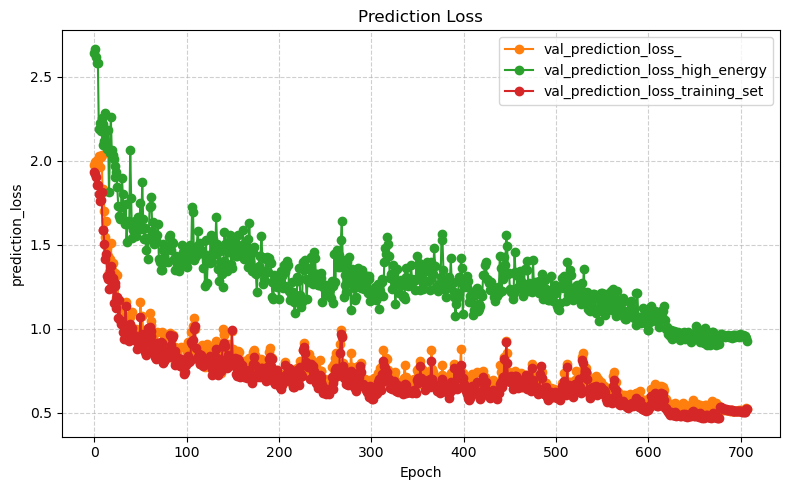

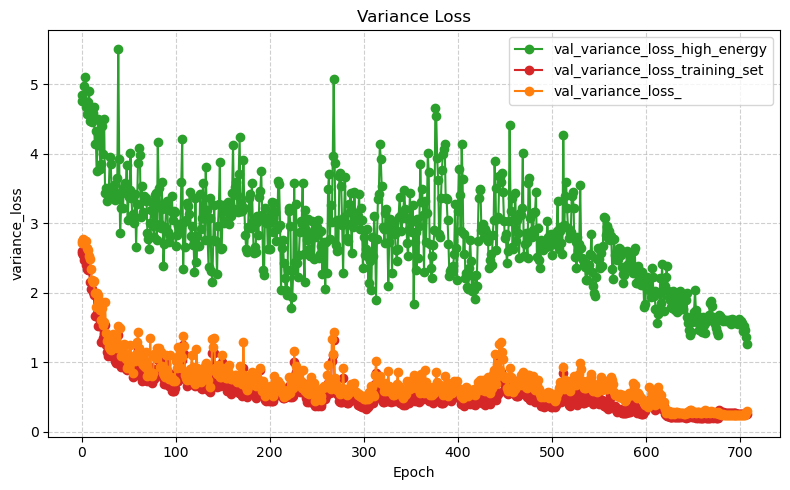

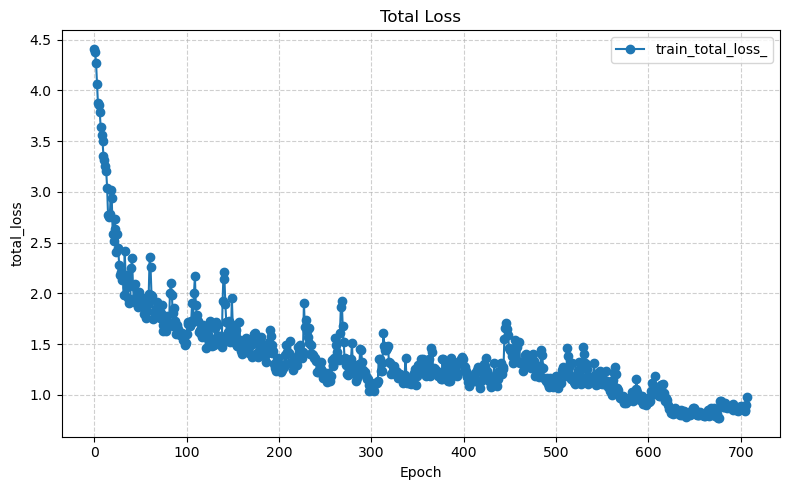

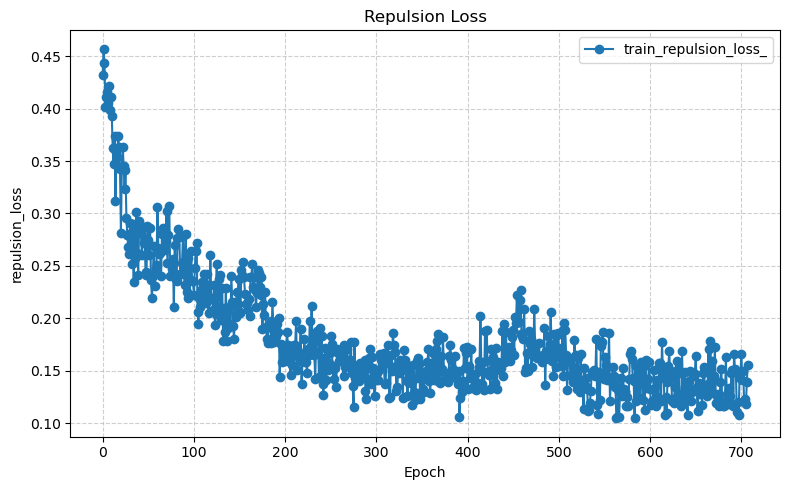

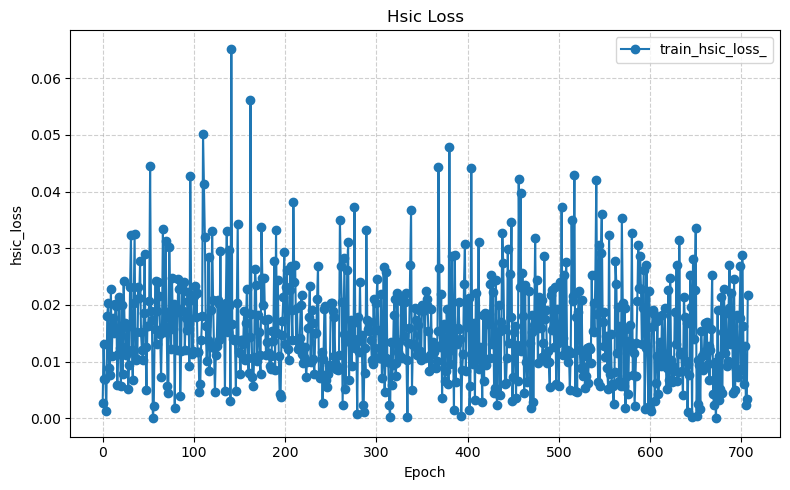

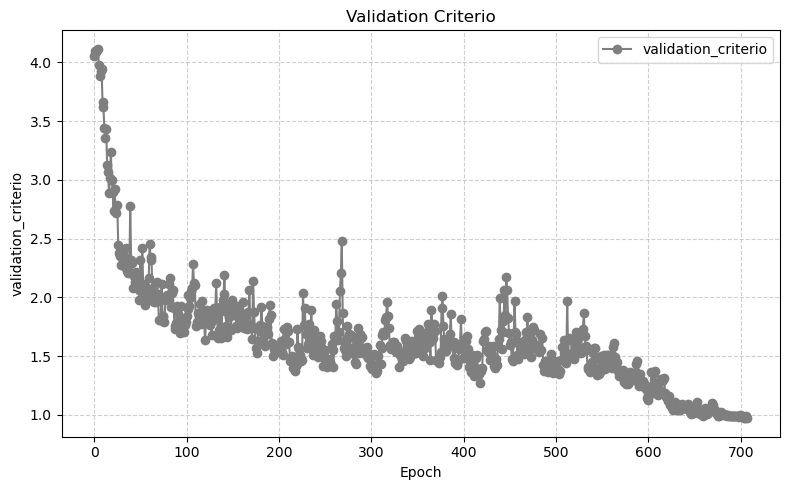

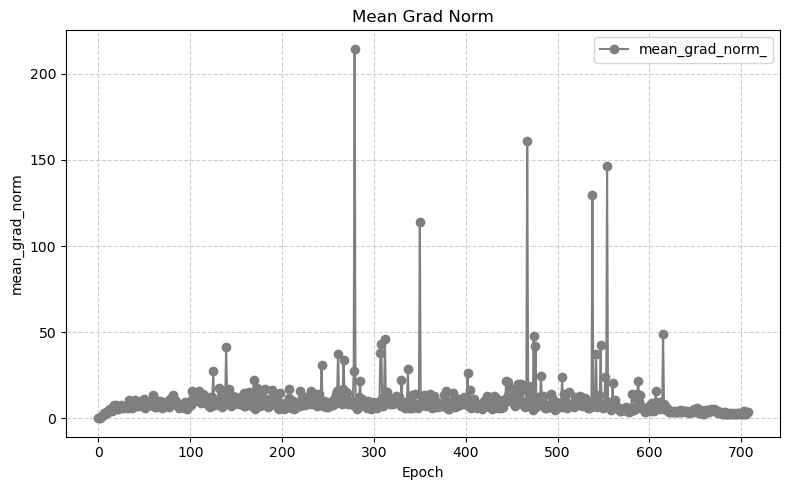

In [101]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "val_variance_loss_high_energy"
, "val_prediction_loss_high_energy", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=None
)




📊 Processing directory: val_trajectories_data

For the epoch_707 in val_trajectories_data the values are:
5: X_mean = -0.6368 ± 0.2842, U_mean = 1.8994 ± 0.3336 and energy=1.3666666666666667, phi0=0.7112530348369385
53: X_mean = 0.0222 ± 0.3937, U_mean = -1.2565 ± 0.4044 and energy=2.006666666666667, phi0=-2.4981901653384453
31: X_mean = -1.3581 ± 0.2913, U_mean = 1.5861 ± 0.3179 and energy=1.7133333333333338, phi0=0.2441816641299383

📊 Processing directory: val_train_set_trajectories_data

For the epoch_707 in val_train_set_trajectories_data the values are:
61: X_mean = -1.3618 ± 0.3433, U_mean = 1.8805 ± 0.3144 and energy=2.1133333333333333, phi0=0.5187756048832214
54: X_mean = -0.3041 ± 0.3779, U_mean = -1.3536 ± 0.3234 and energy=2.02, phi0=-2.234453591452867
16: X_mean = -1.1975 ± 0.2900, U_mean = -0.0564 ± 0.5019 and energy=1.5133333333333334, phi0=-1.1130378924250106

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_707 in val_high_energy_trajectories_da

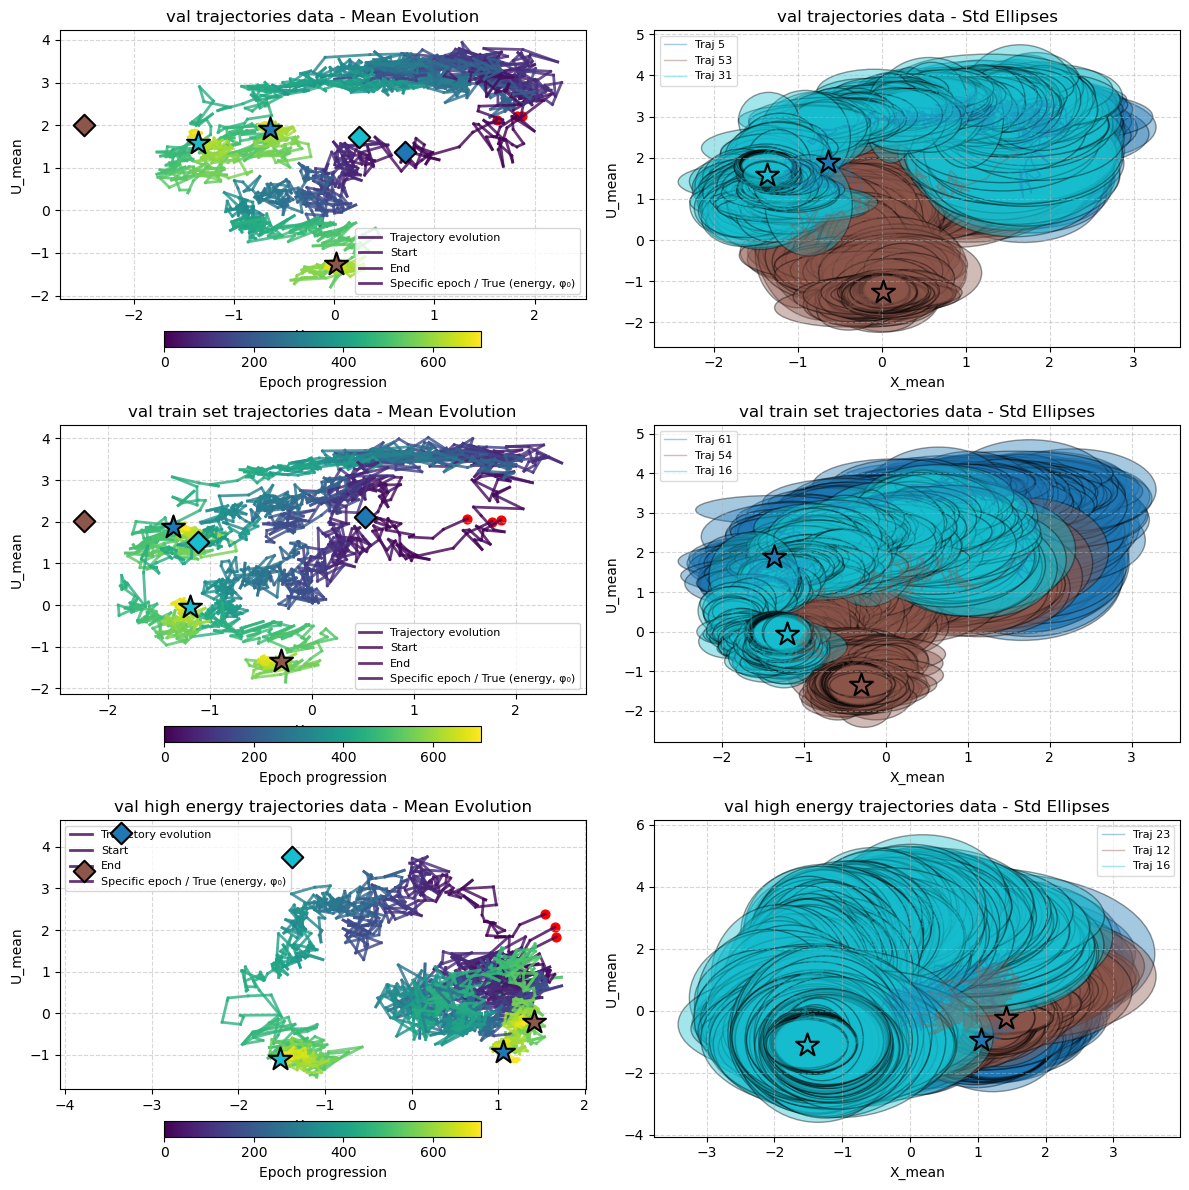


✅ Mean + Std (ellipse) visualization complete.


In [102]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_low_samples_pendulum,val_id_df_added=val_id_df_low_samples_pendulum,val_id_df_high_energy_added=val_id_df_high_energy_low_samples_pendulum, pendulum=True)

In [103]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_low_samples_pendulum,
    val_id_df_added=val_id_df_low_samples_pendulum,
    val_id_df_high_energy_added=val_id_df_high_energy_low_samples_pendulum,
    pendulum=True
)

📂 Using data from epoch: epoch_707
✅ Data extraction complete.


In [104]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['energy']),
    y=torch.Tensor(val_train_differencies_set_df['phi0']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [105]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0019)

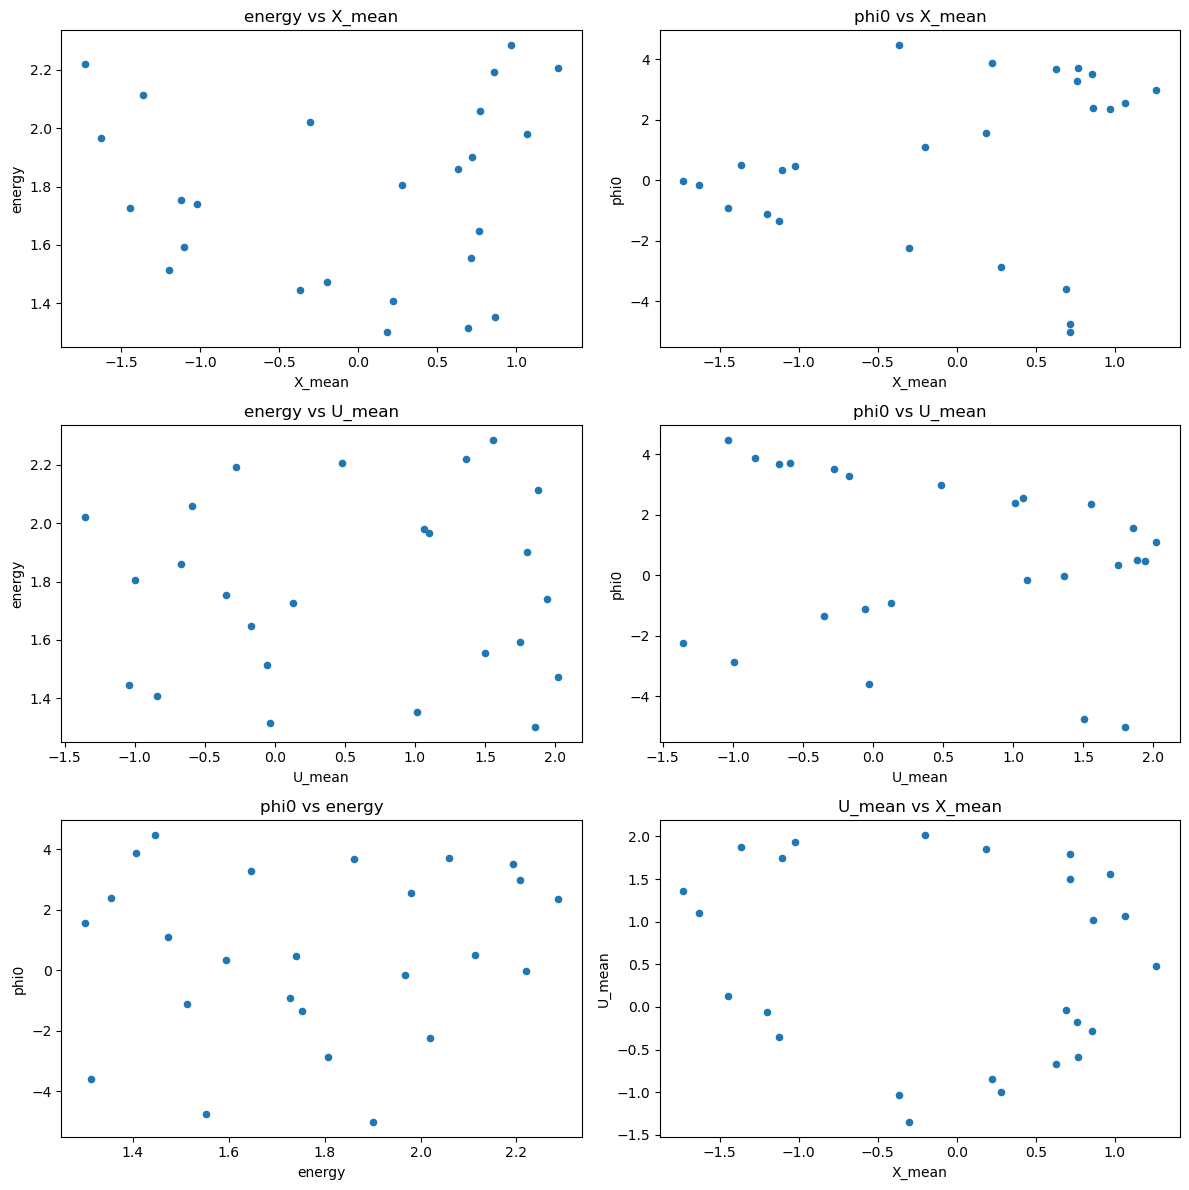

In [106]:
plot_differencies(val_train_differencies_set_df, pendulum=True)

📊 Analyzing 708 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


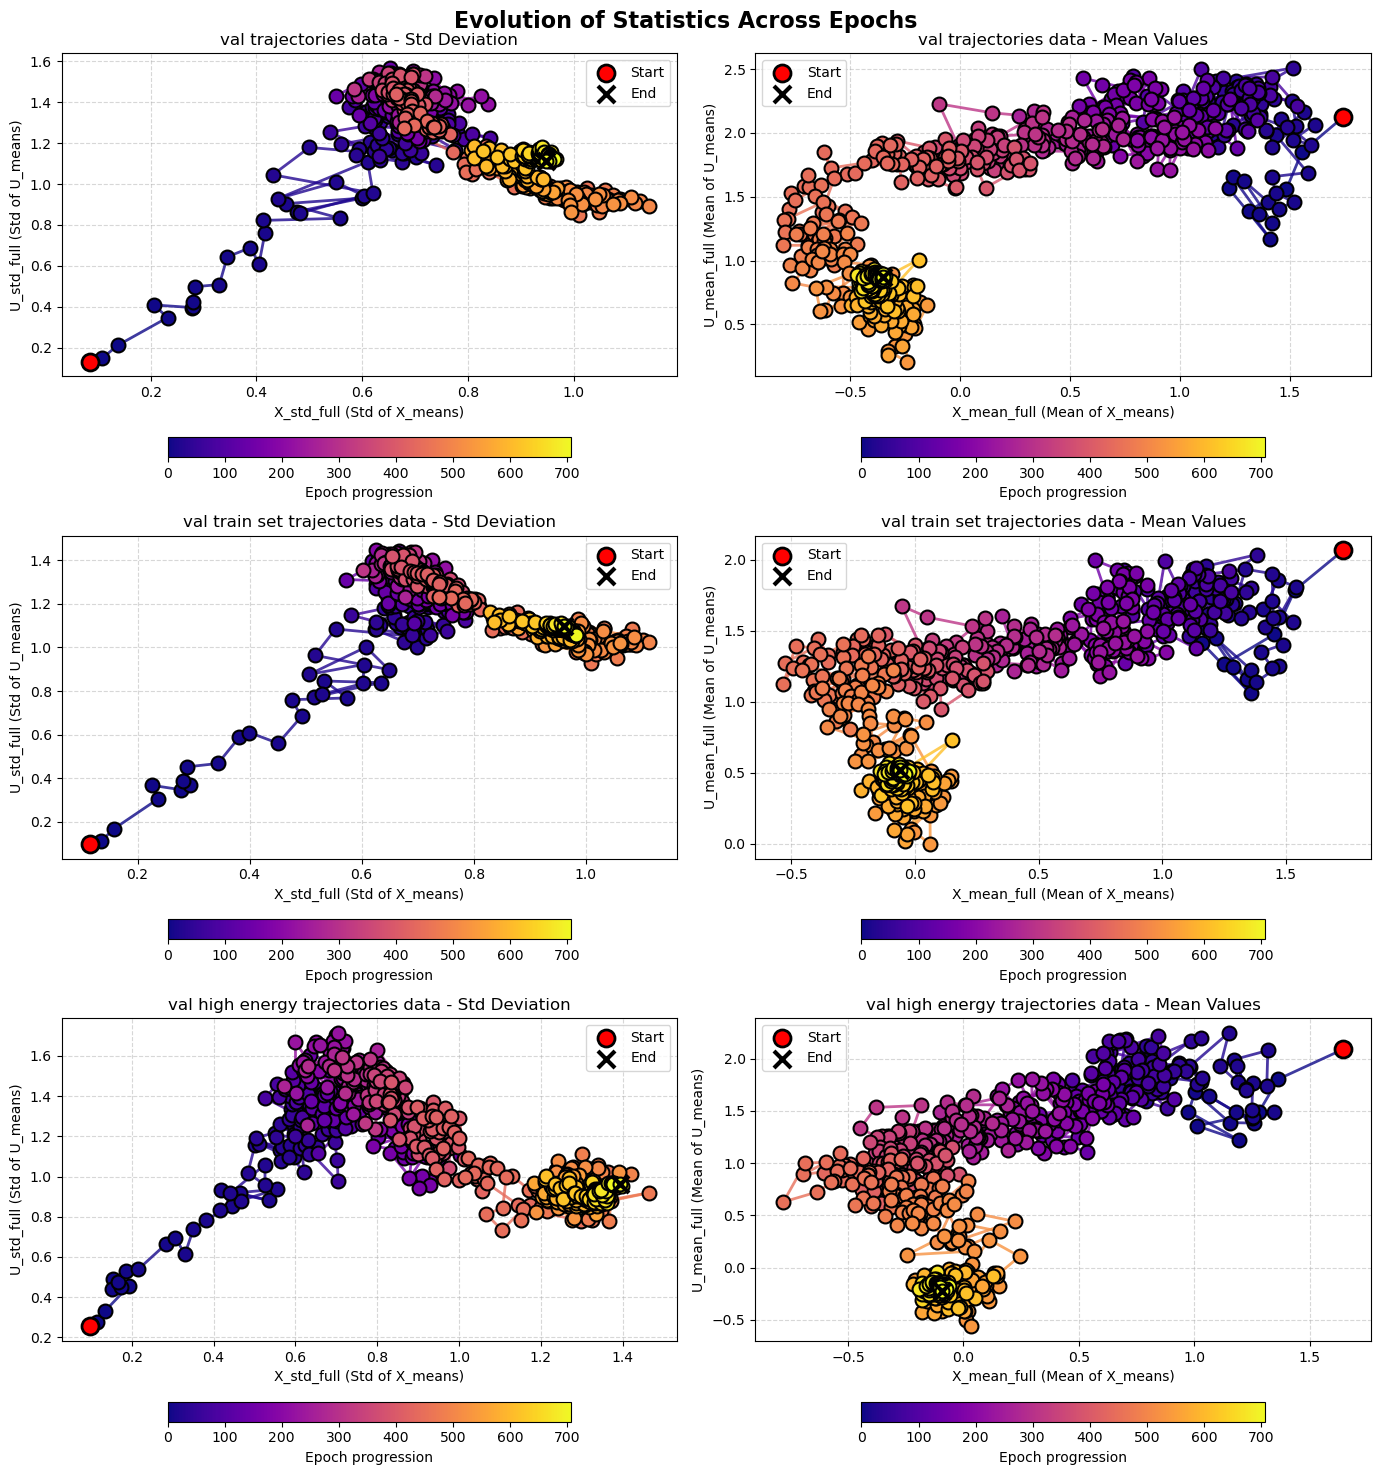

In [107]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [108]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [33, 60, 32],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4084: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [109]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, trajectory_id=20, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
✓ All 30 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 5.36e-07
For the inverse network:
✓ All 30 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 3.58e-07


In [110]:
print(f"Number of parameters are: {count_parameters(mapping_net)}, with number of training samples: {train_df_low_samples_pendulum.shape[0]}\nThat is a ratio of parameters/samples of: {count_parameters(mapping_net)/train_df_low_samples_pendulum.shape[0]}")

Number of parameters are: 82560, with number of training samples: 750
That is a ratio of parameters/samples of: 110.08


   num_observed_points  mean_loss
0                    1   0.140613
1                    2   0.133204
2                    3   0.121287
3                    4   0.116182
4                    5   0.111586
5                    6   0.105052
6                    7   0.101899
7                    8   0.107728
8                    9   0.100650
9                   10   0.095799


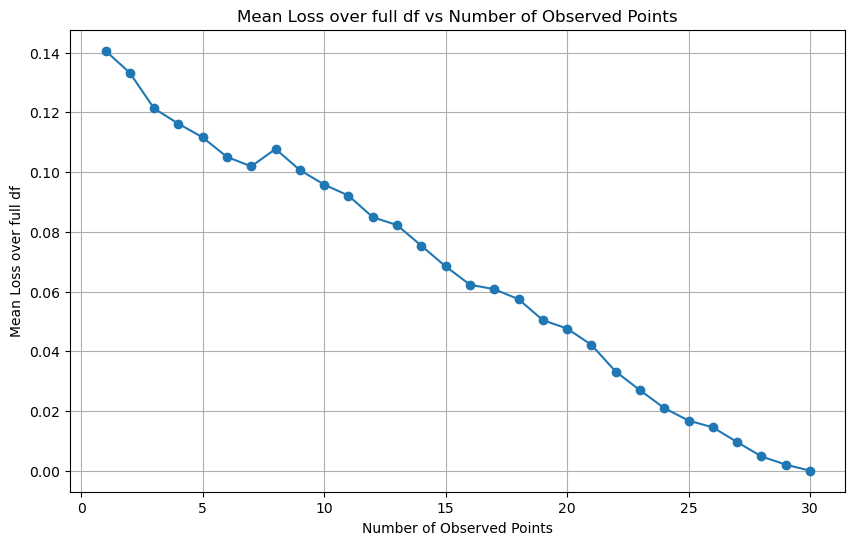

In [111]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       0.012109
2                    3       0.017283
3                    4       0.021003
4                    5       0.016967
5                    6       0.016242
6                    7       0.018054
7                    8       0.016674
8                    9       0.015589
9                   10       0.017278


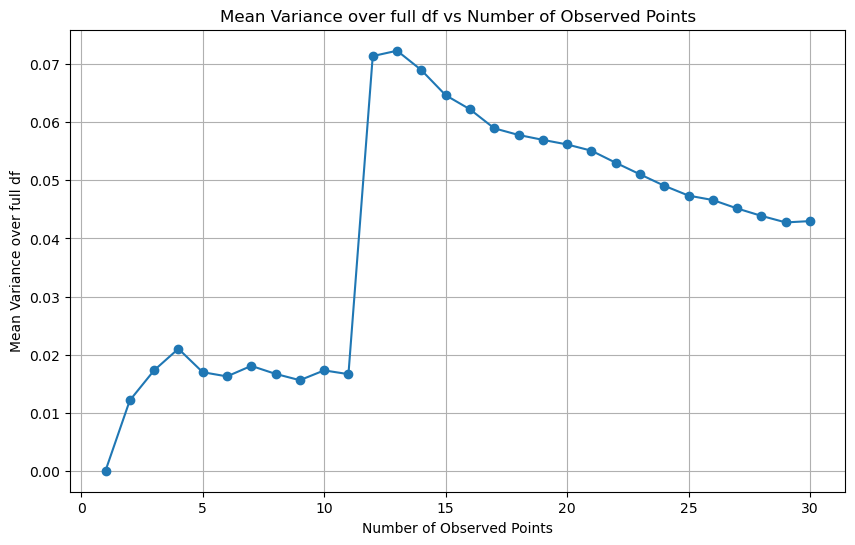

In [112]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net ,device=device)

In [70]:
point_indexes_observed = [24]

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
3               3  1.340000         0.122203              0.105567
5               5  1.366667         0.138088              0.118120
7               7  1.393333         0.082786              0.070134
10             10  1.433333         0.128726              0.107521
14             14  1.486667         0.109032              0.089423
18             18  1.540000         0.096934              0.078112
20             20  1.566667         0.122753              0.098072
21             21  1.580000         0.101987              0.081137
23             23  1.606667         0.100475              0.079268
27             27  1.660000         0.137300              0.106565
31             31  1.713333         0.112469              0.085924
35             35  1.766667         0.123425              0.092859
37             37  1.793333         0.114881              0.085786
44             44  1.886667         0.114743              0.08

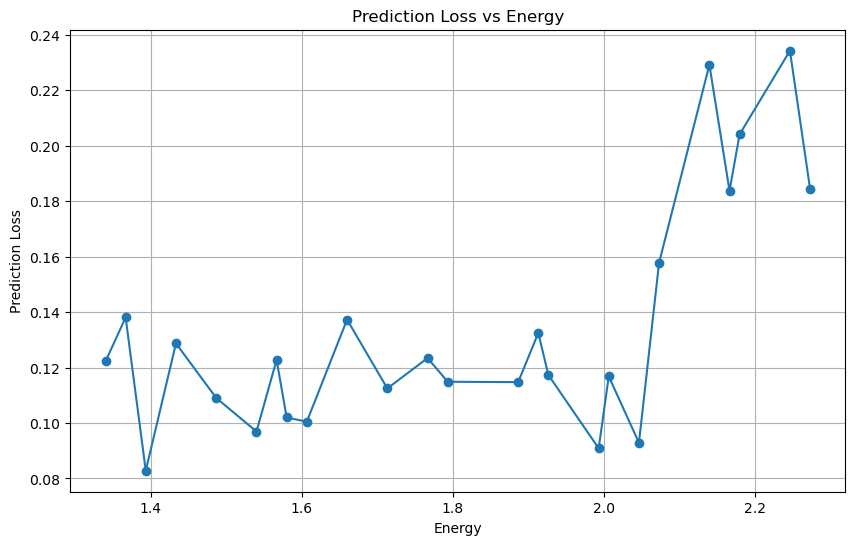

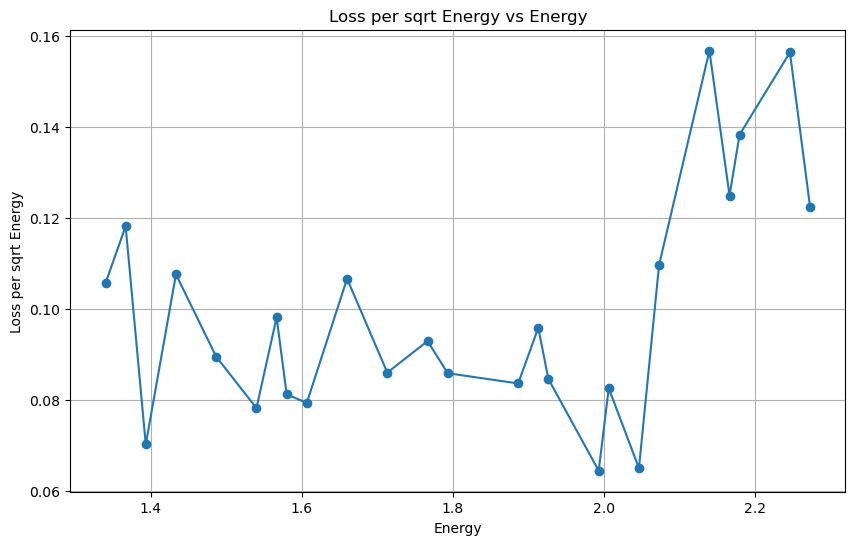

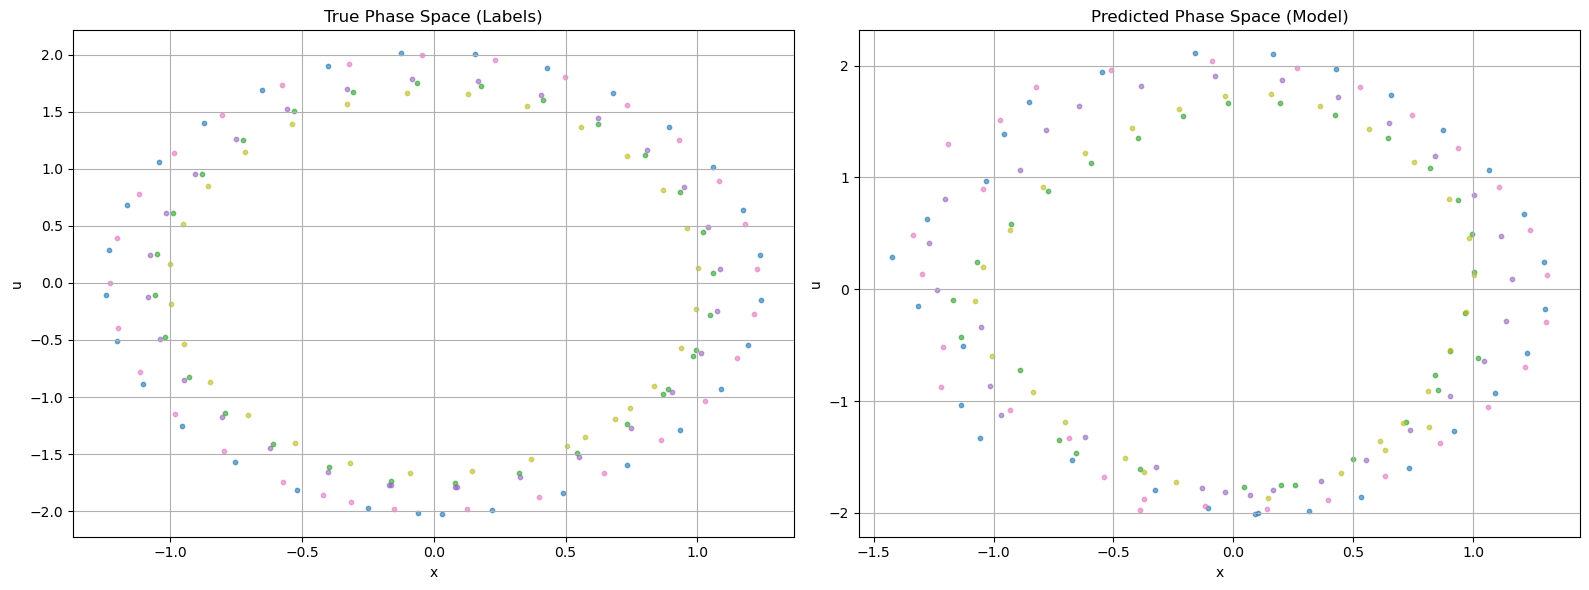

In [113]:
prediction_val_df, mean_prediction_loss_val, pred_val_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
3               3  1.340000            0.0                       0.0
5               5  1.366667            0.0                       0.0
7               7  1.393333            0.0                       0.0
10             10  1.433333            0.0                       0.0
14             14  1.486667            0.0                       0.0
18             18  1.540000            0.0                       0.0
20             20  1.566667            0.0                       0.0
21             21  1.580000            0.0                       0.0
23             23  1.606667            0.0                       0.0
27             27  1.660000            0.0                       0.0
31             31  1.713333            0.0                       0.0
35             35  1.766667            0.0                       0.0
37             37  1.793333            0.0                       0.0
44             44  1.886667       

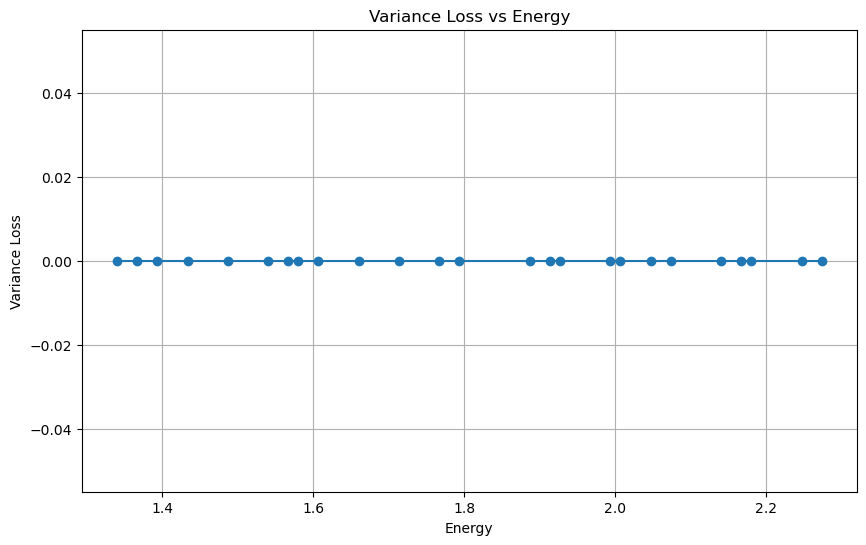

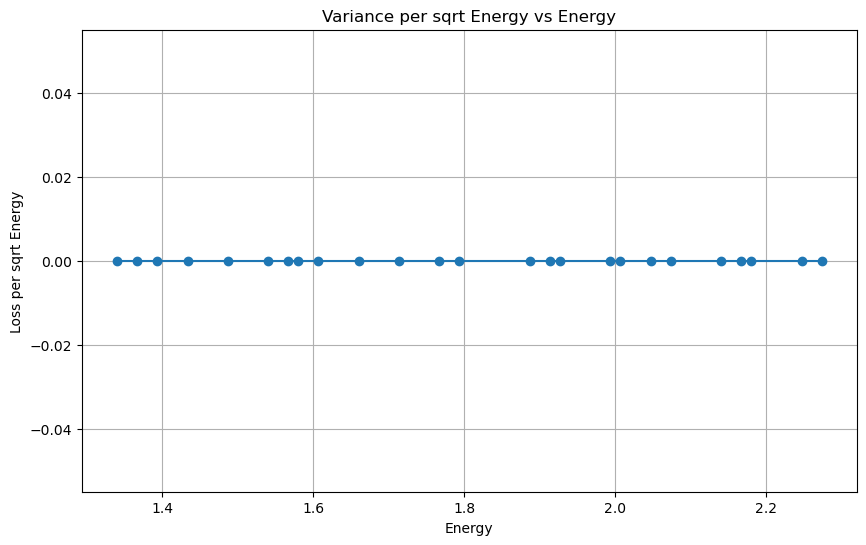

In [72]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [73]:
trajectory_id_to_show_val=52
period_val = val_id_df_low_samples_pendulum[val_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_val]['period'].values[0] if val_id_df_low_samples_pendulum[val_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_val]['motion_type'].values[0] == "oscillating" else 0.0

Observed time points: [3.36]


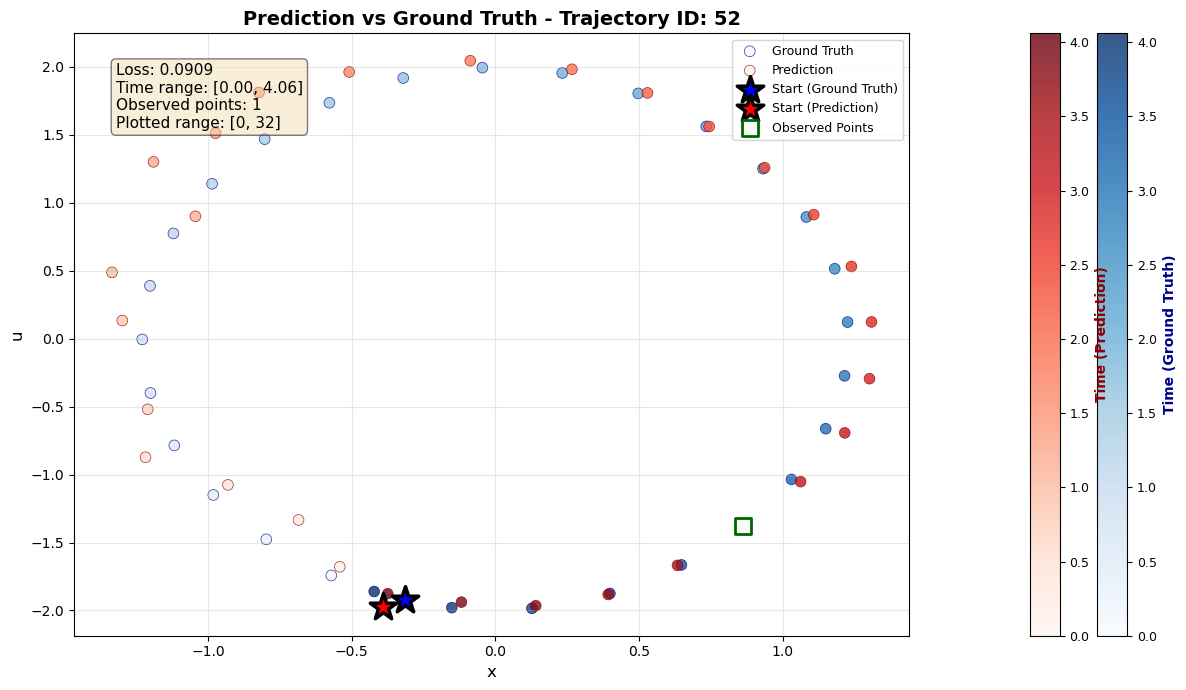

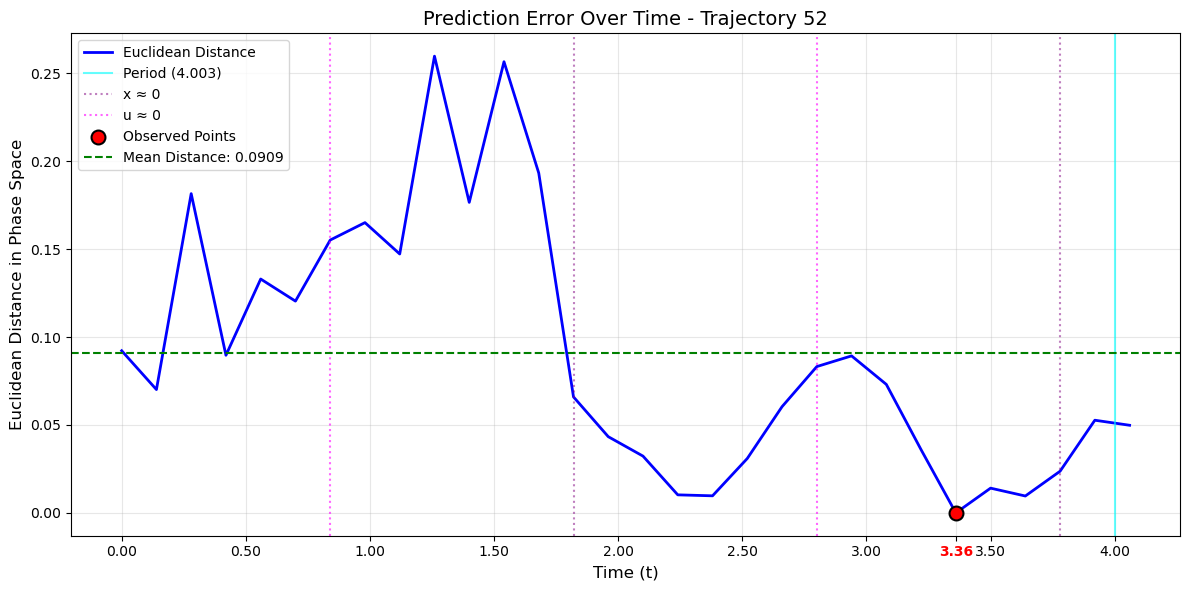

In [74]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, trajectory_id=trajectory_id_to_show_val, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period_val)

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
2               2  1.326667         0.096699              0.083954
6               6  1.380000         0.129257              0.110031
9               9  1.420000         0.139531              0.117092
12             12  1.460000         0.096001              0.079451
15             15  1.500000         0.096126              0.078487
17             17  1.526667         0.076184              0.061658
24             24  1.620000         0.114531              0.089984
25             25  1.633333         0.101874              0.079713
28             28  1.673333         0.112476              0.086949
29             29  1.686667         0.118093              0.090931
30             30  1.700000         0.089594              0.068715
36             36  1.780000         0.101824              0.076320
39             39  1.820000         0.089966              0.066687
40             40  1.833333         0.106655              0.07

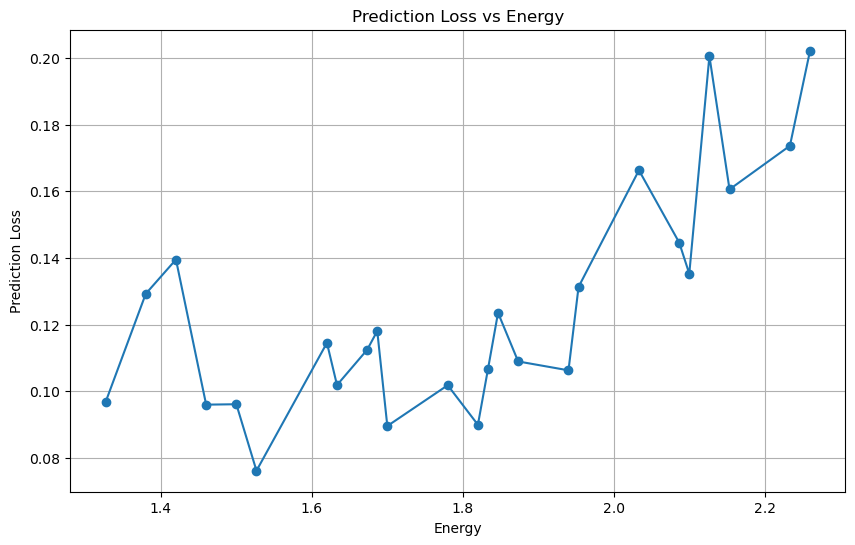

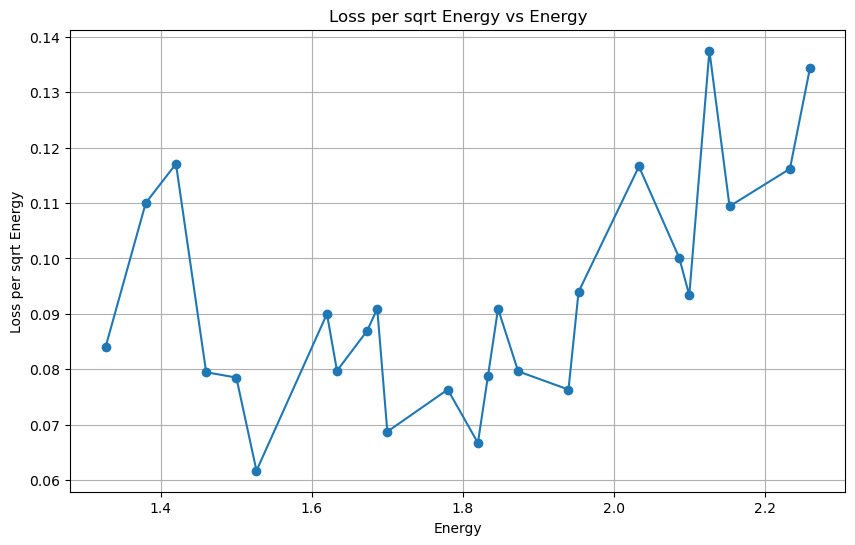

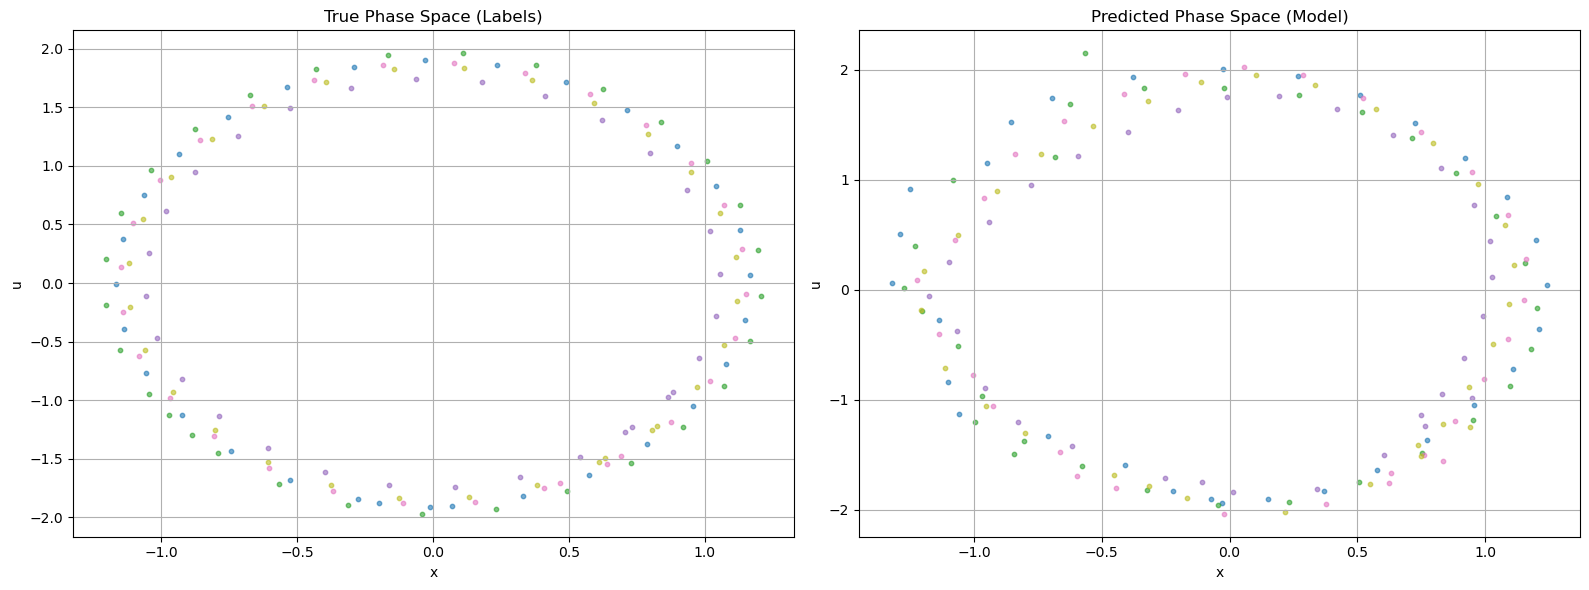

In [114]:
prediction_test_df, mean_prediction_loss_test, pred_test_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples_pendulum, test_df=test_df_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
2               2  1.326667            0.0                       0.0
6               6  1.380000            0.0                       0.0
9               9  1.420000            0.0                       0.0
12             12  1.460000            0.0                       0.0
15             15  1.500000            0.0                       0.0
17             17  1.526667            0.0                       0.0
24             24  1.620000            0.0                       0.0
25             25  1.633333            0.0                       0.0
28             28  1.673333            0.0                       0.0
29             29  1.686667            0.0                       0.0
30             30  1.700000            0.0                       0.0
36             36  1.780000            0.0                       0.0
39             39  1.820000            0.0                       0.0
40             40  1.833333       

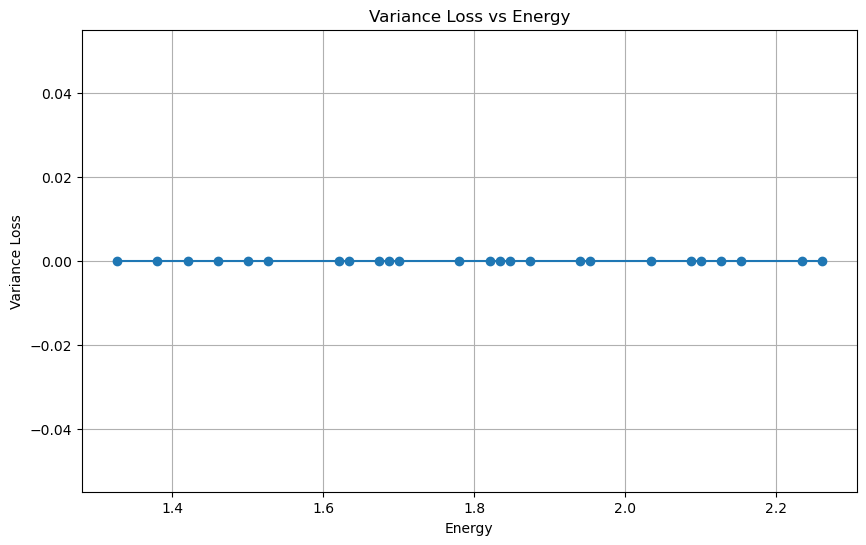

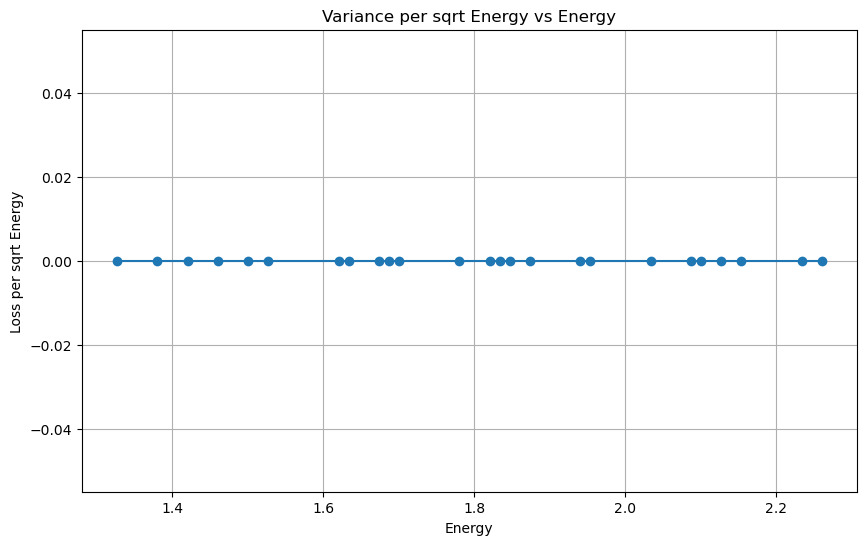

In [76]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_low_samples_pendulum, test_df=test_df_low_samples_pendulum, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [77]:
trajectory_id_to_show_test=17
period_test = test_id_df_low_samples_pendulum[test_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test]['period'].values[0] if test_id_df_low_samples_pendulum[test_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test]['motion_type'].values[0] == "oscillating" else 0.0

Observed time points: [3.36]


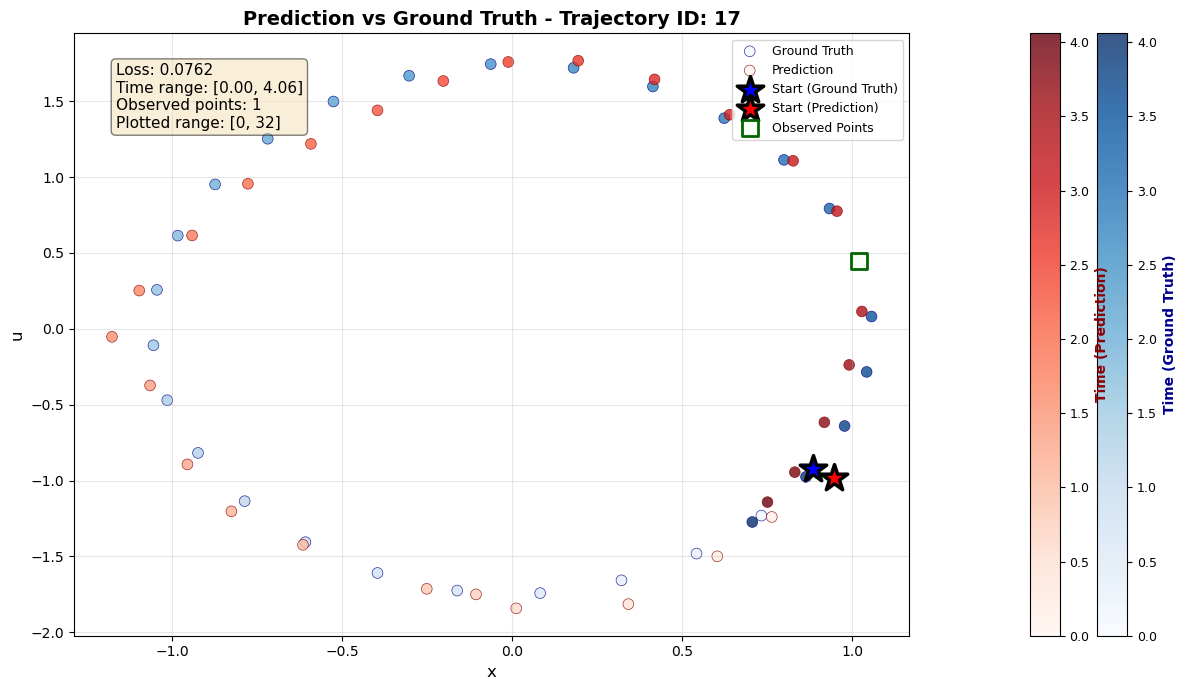

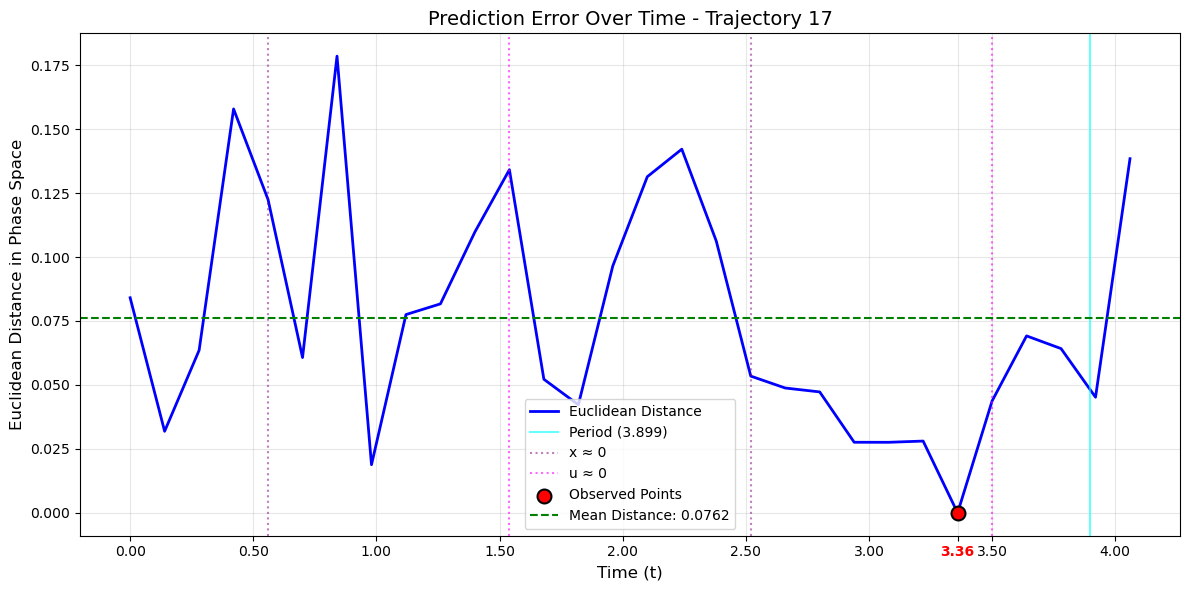

In [78]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples_pendulum, test_df=test_df_low_samples_pendulum, trajectory_id=trajectory_id_to_show_test, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period_test)

In [79]:
print(f"The max energy of a trajectory in the training set is: {train_id_df_low_samples_pendulum['energy'].max():.3f}\nThe high energy testing set has energies in the range: {test_id_df_high_energy_low_samples_pendulum['energy'].min():.3f}-{test_id_df_high_energy_low_samples_pendulum['energy'].max():.3f}")

The max energy of a trajectory in the training set is: 2.287
The high energy testing set has energies in the range: 2.400-4.431


In [83]:
point_indexes_observed_high_energy = [16]


    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
0               0  2.400000         0.367264              0.237068
5               5  2.823077         0.298218              0.177489
6               6  2.907692         0.526797              0.308936
8               8  3.076923         0.376076              0.214396
10             10  3.246154         0.473307              0.262699
11             11  3.330769         0.376689              0.206400
13             13  3.500000         0.525489              0.280886
14             14  3.584615         0.528930              0.279368
17             17  3.838462         0.915692              0.467381
19             19  4.007692         0.593457              0.296444
20             20  4.092308         0.699149              0.345610
21             21  4.176923         0.737707              0.360957
24             24  4.430769         1.457364              0.692355
Mean prediction loss over full dataframe: 0.6059


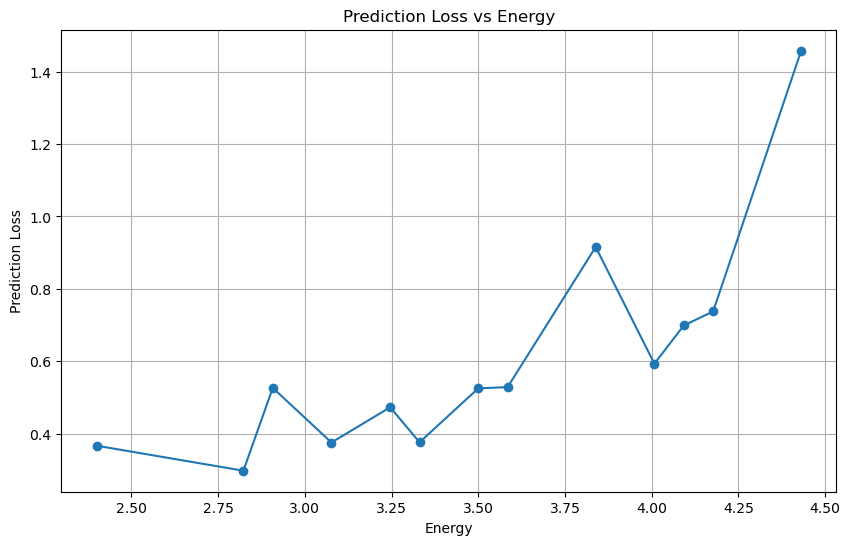

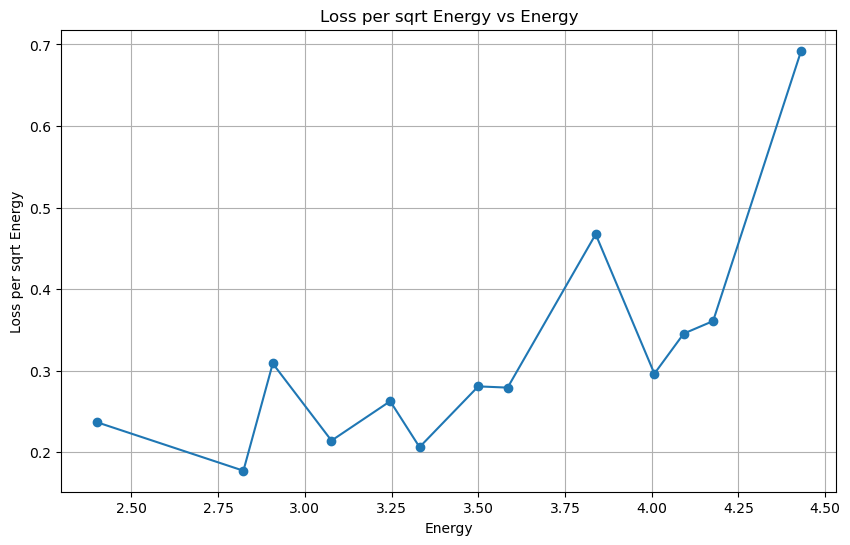

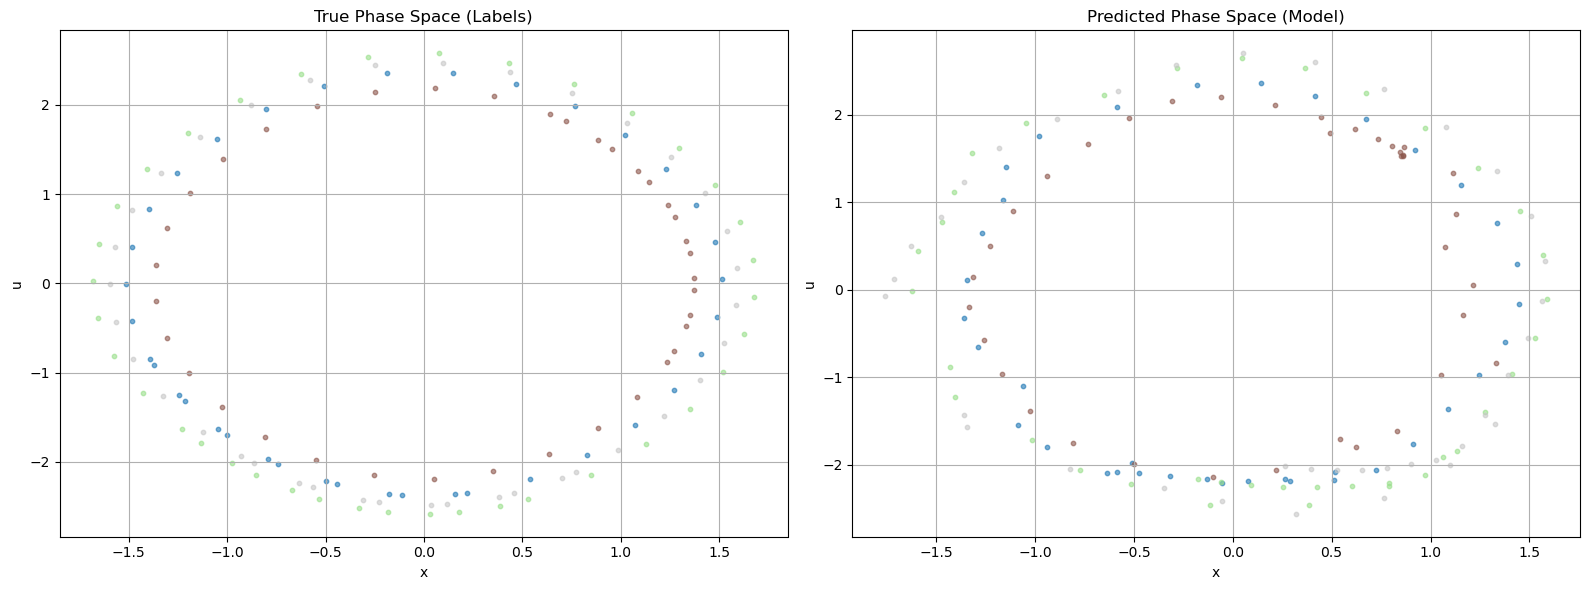

In [86]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy, pred_test_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_low_samples_pendulum, test_df=test_df_high_energy_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.3)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
0               0  2.400000            0.0                       0.0
5               5  2.823077            0.0                       0.0
6               6  2.907692            0.0                       0.0
8               8  3.076923            0.0                       0.0
10             10  3.246154            0.0                       0.0
11             11  3.330769            0.0                       0.0
13             13  3.500000            0.0                       0.0
14             14  3.584615            0.0                       0.0
17             17  3.838462            0.0                       0.0
19             19  4.007692            0.0                       0.0
20             20  4.092308            0.0                       0.0
21             21  4.176923            0.0                       0.0
24             24  4.430769            0.0                       0.0
Mean prediction loss over full dat

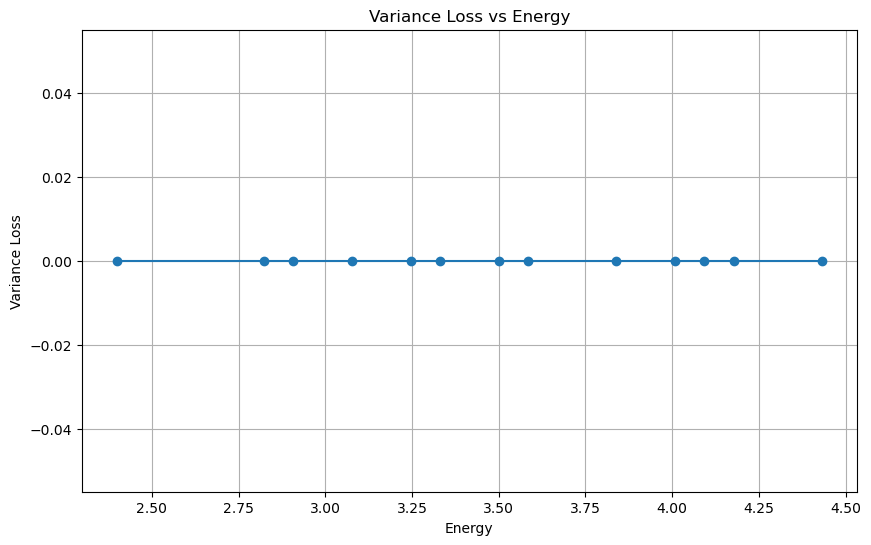

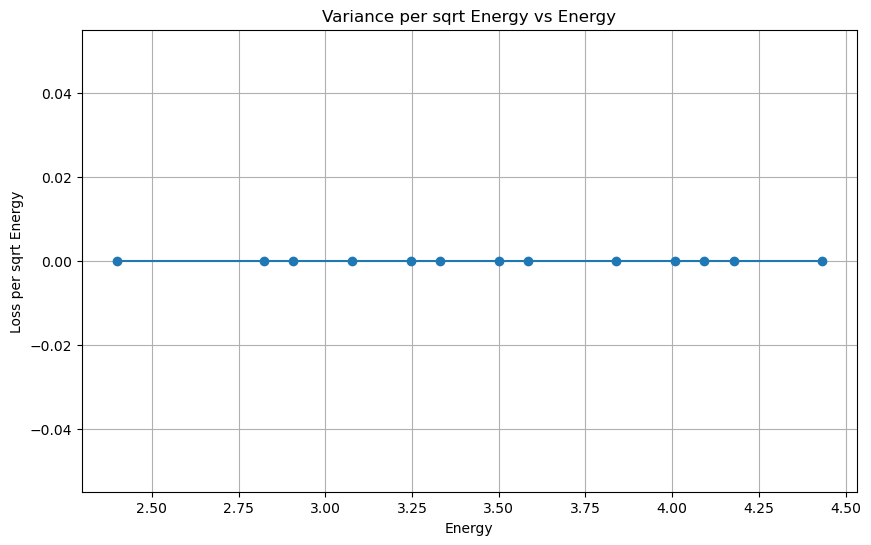

In [87]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_low_samples_pendulum, test_df=test_df_high_energy_low_samples_pendulum, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


In [88]:
trajectory_id_to_show_test_high_energy=19
period_test_high_energy = test_id_df_high_energy_low_samples_pendulum[test_id_df_high_energy_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test_high_energy]['period'].values[0] if test_id_df_high_energy_low_samples_pendulum[test_id_df_high_energy_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test_high_energy]['motion_type'].values[0] == "oscillating" else 0.0

Observed time points: [2.24]


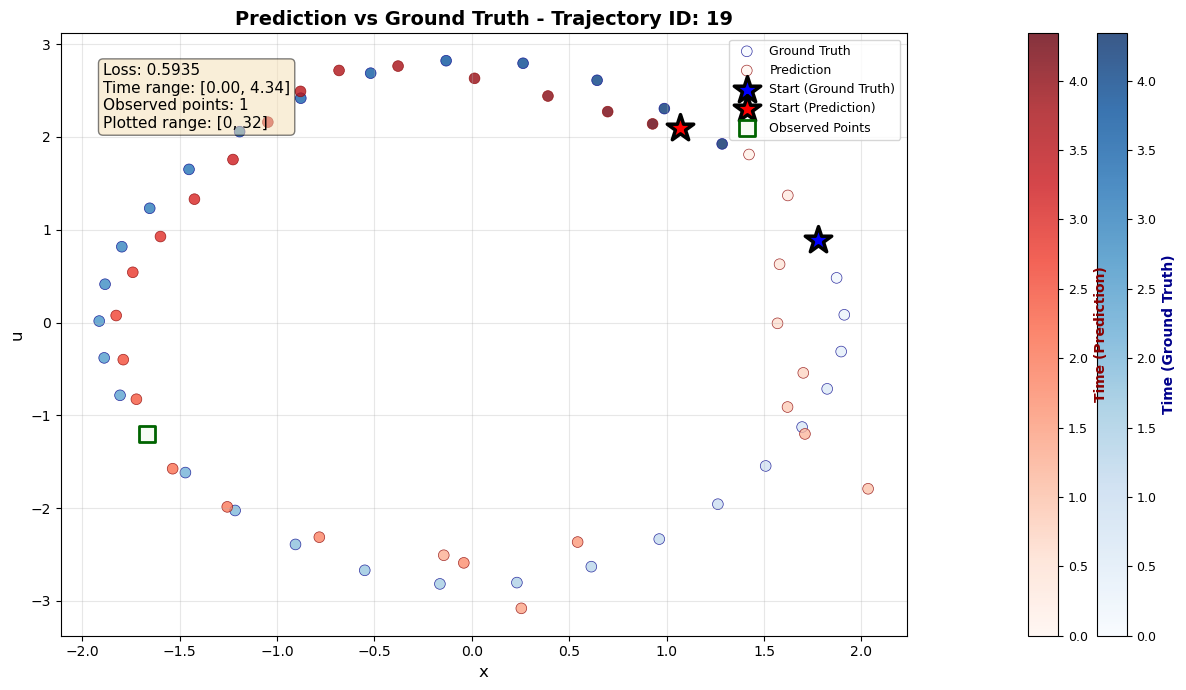

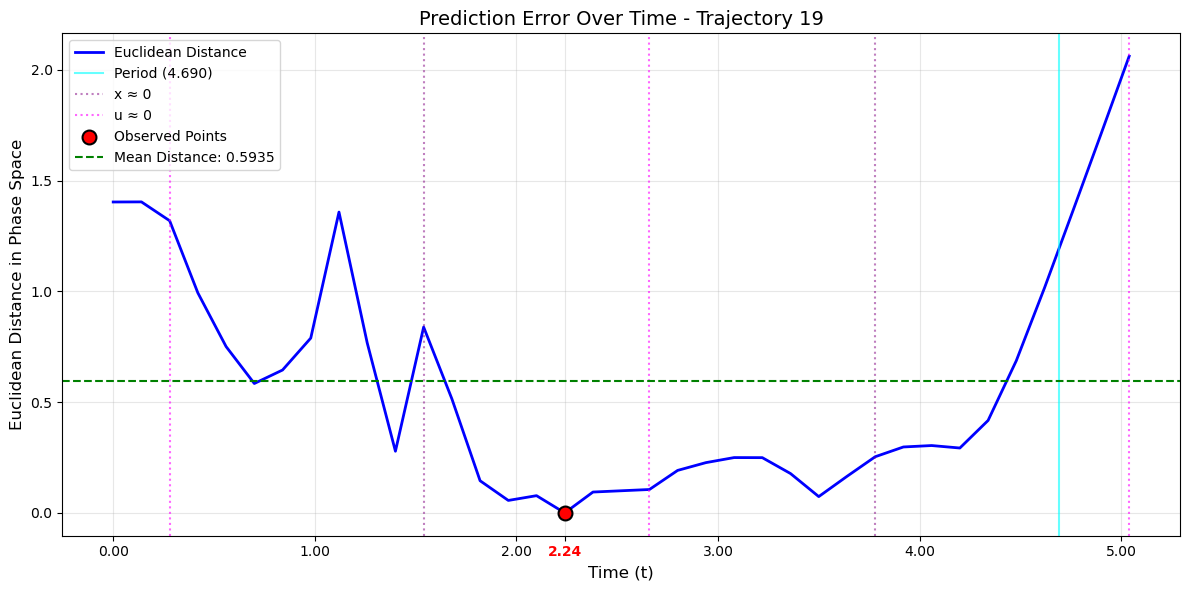

In [89]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_low_samples_pendulum, test_df=test_df_high_energy_low_samples_pendulum, trajectory_id=trajectory_id_to_show_test_high_energy, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=test_id_df_high_energy_low_samples_pendulum[test_id_df_high_energy_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test_high_energy]['period'].values[0])

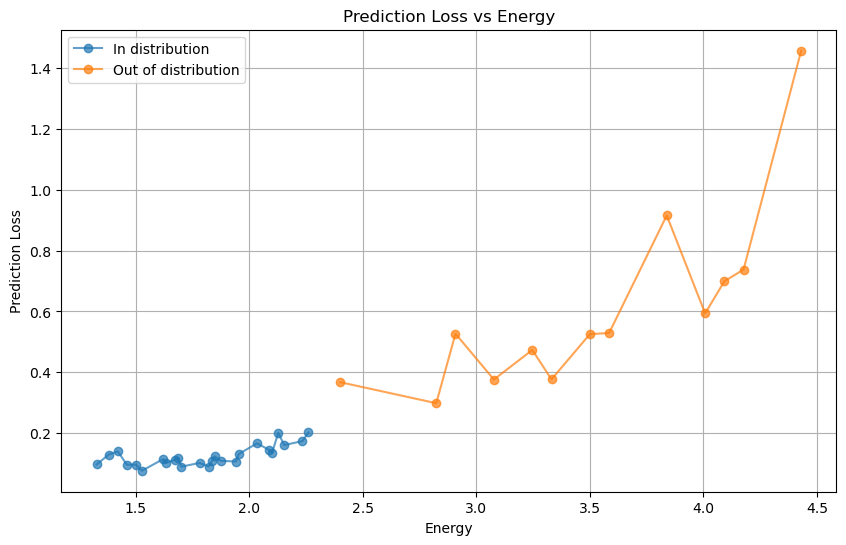

In [115]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

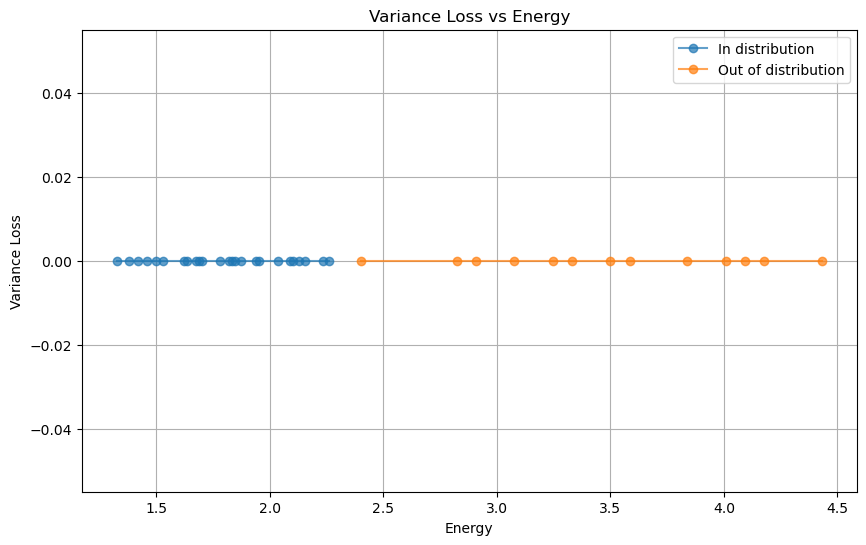

In [91]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 0.641±0.170

Step 2 gamma values mean: 0.658±0.178



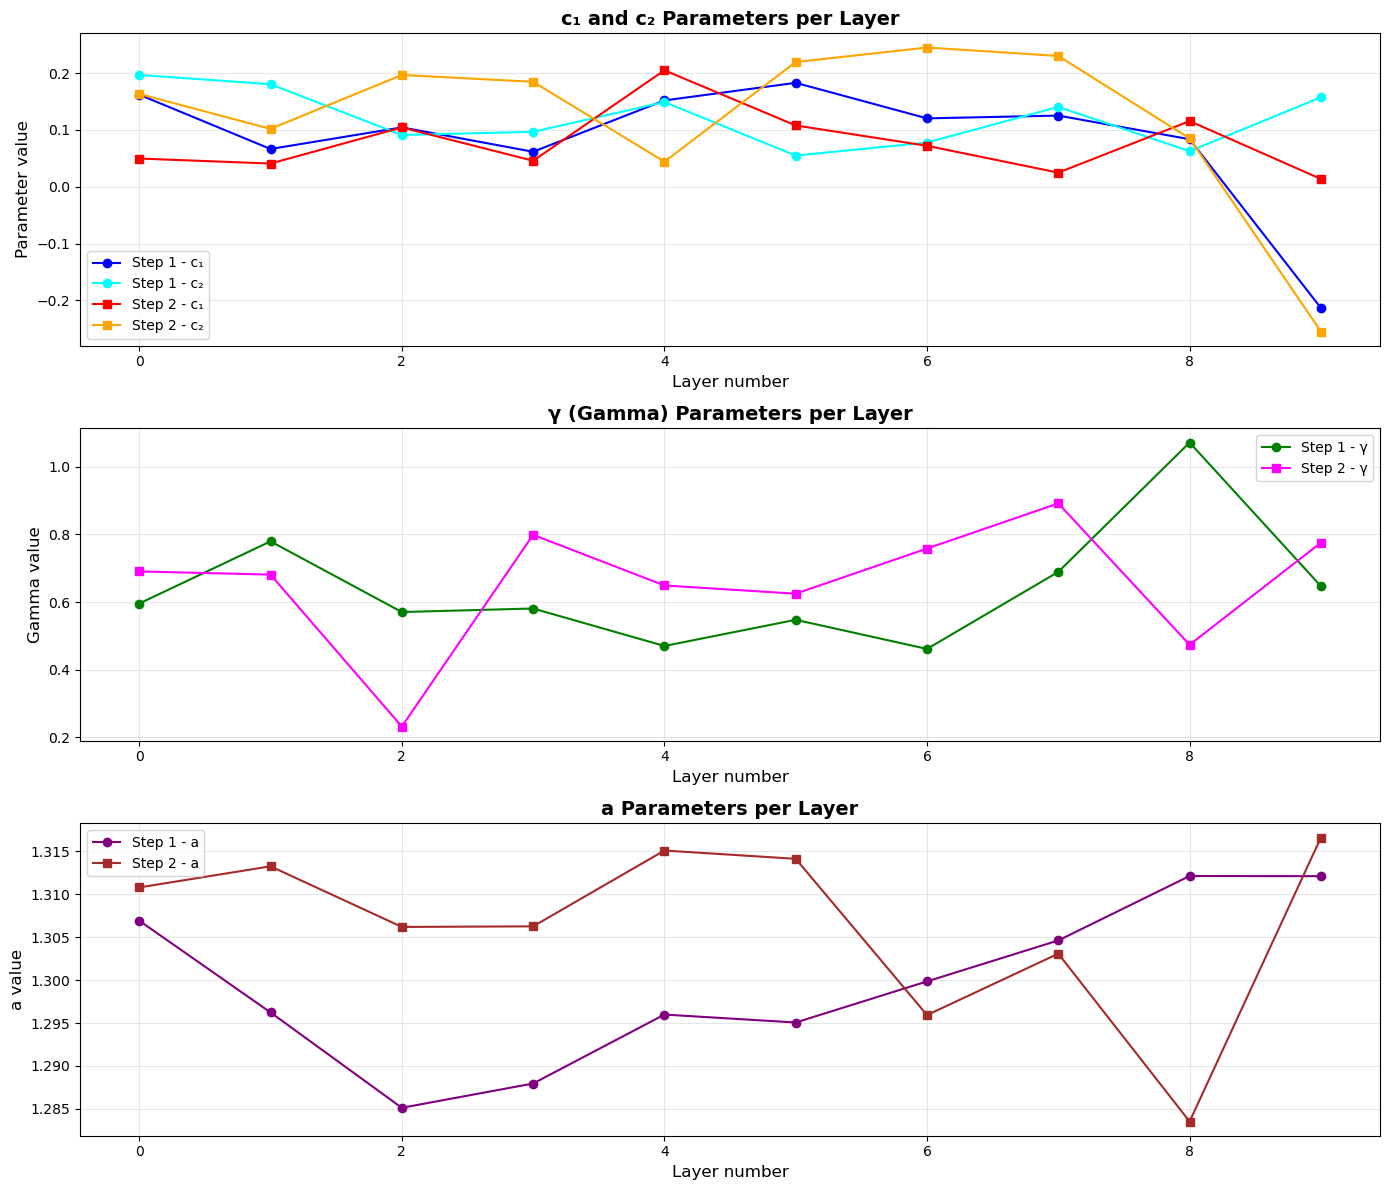

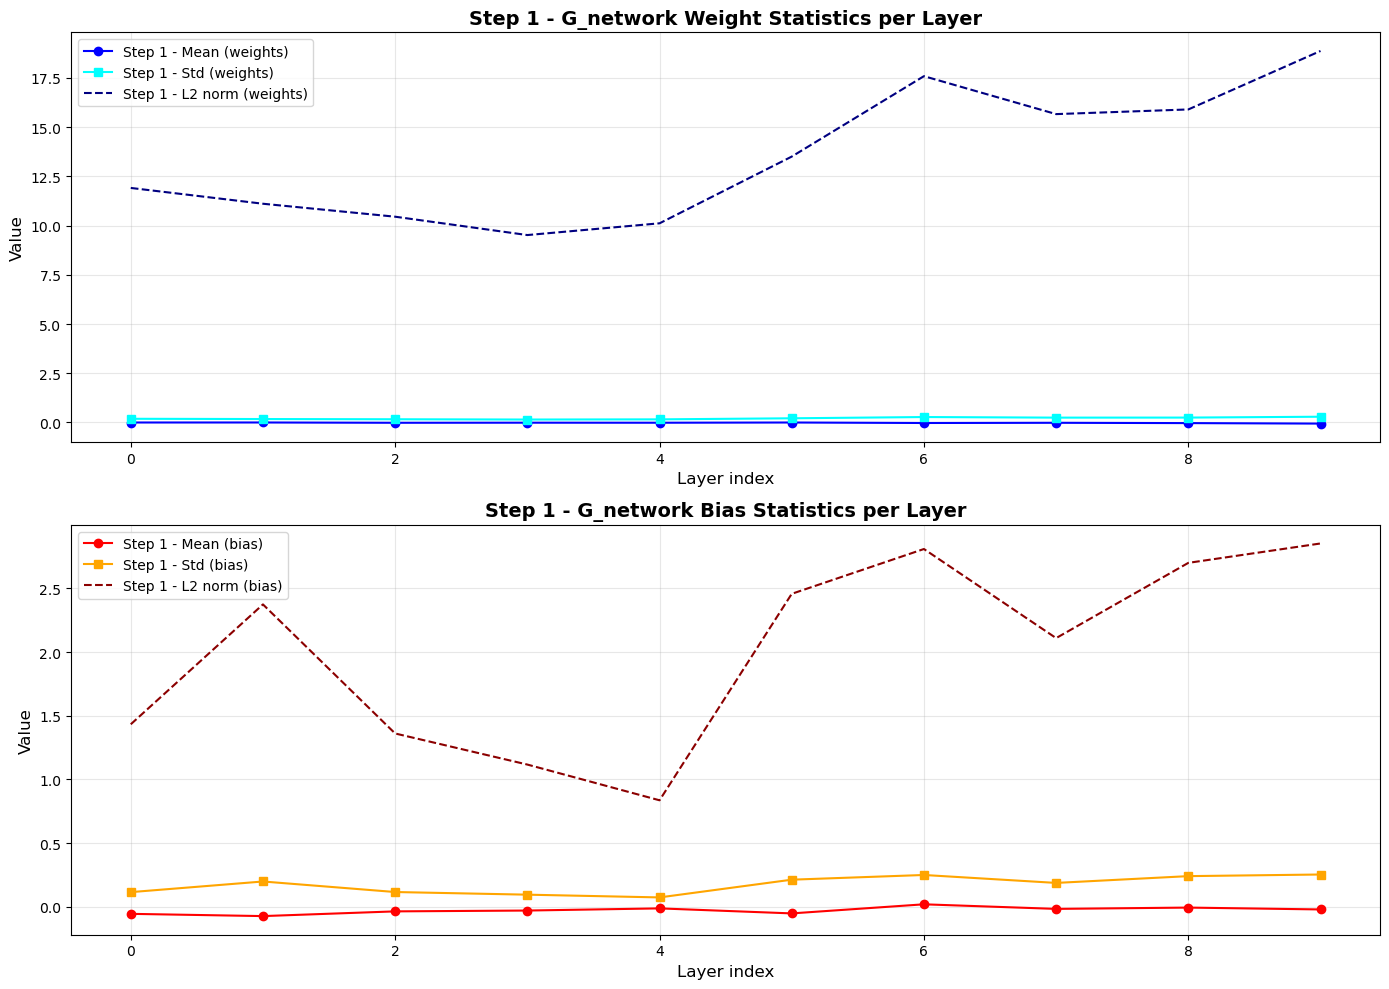

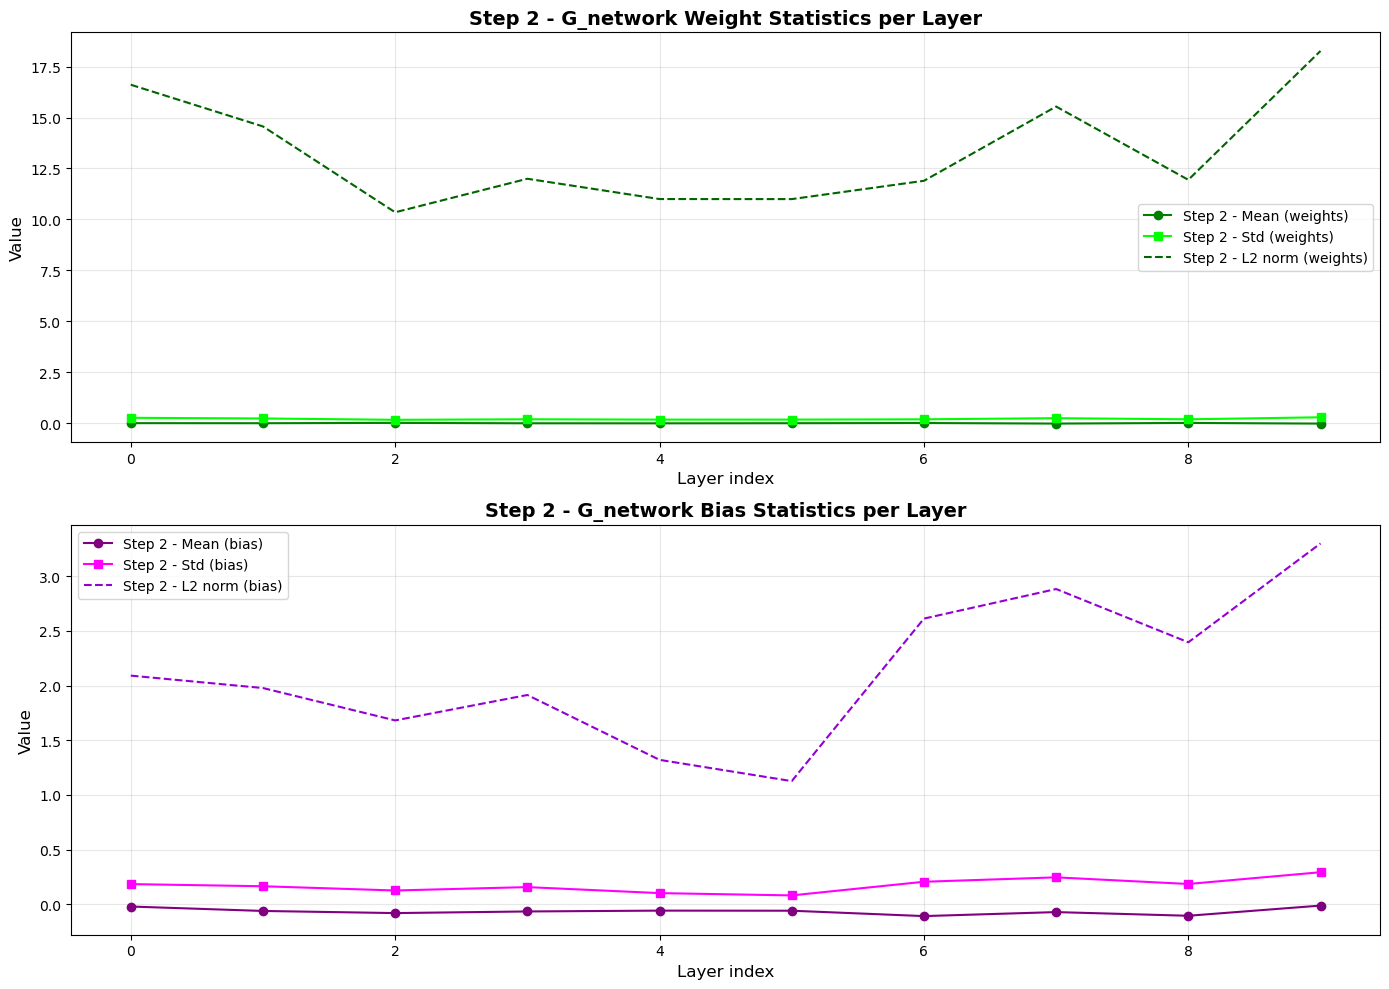

In [92]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)
